<a href="https://colab.research.google.com/github/majapavi/UmjetnaInteligencija/blob/main/Mastermind_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mastermind - min-max algoritam Donalda Knuta
izradila: Maja Pavičić<br>
kolegij: Umjetna inteligencija, prof. dr. sc. Luka Grubišić<br>
Prirodoslovno - matematički fakultet, Sveučilište u Zagrebu, prosinac 2023.

## Opis igre

Mastermind je igra za dva igrača. U klasičnoj varijanti igre igrač zadaje prvi tajni niz od 4 boje, pri čemu svaki član niza može biti jedna od 6 boja (dozvoljena su ponavljanja boja). Boje ćemo od sada označavati oznakama {1, ..., 6}. Drugi igrač nastoji pogoditi zadani niz.
U svakom koraku igre drugi igrač predlaže niz od 4 boje. Prvi igrač uspoređuje predloženi i tajni niz. Sa brC označimo broj mjesta u nizu, za koje su boja predloženog i tajnog niza jednake. Zatim pogledamo ima li na preostalim mjestima još nekih boja koje se pojavljuju u oba niza. Broj takvih podudaranja označimo sa brB. Prvi igrač drugome vraća povratnu informaciju o vrijednostima brB i brC.
Krugovi se ponavljaju, dok drugi igrač ne uspije točno pogoditi tajni niz.

[Ovdje](https://webgamesonline.com/mastermind/) je trenutno dostupna jedna online simulacija igre Mastermind gdje možete pokušati pogoditi tajni kod koji će vam zadati računalo. Prvo podesite da se boje mogu ponavljati i ponovno pokrenite igru. Simulaciju sam pronašla na internetu i nisam njezin autor.

 Godine 1997. Donald Knuth, američki matematičar, pokazao je da se tajni niz uvijek može odrediti u najviše 5 poteza. Njegovo rješenje bazira se na min-max algoritmu i korištenju brzine računala jer pretpostavlja da se u svakom trenutku može brzo i efikasno točno odrediti koji su preostali neeliminirani kandidati za tajni kod. Njegov algoritam argumentiramo i implementiramo u nastavku.

## [Donald Ervin Knuth](https://https://en.wikipedia.org/wiki/Donald_Knuth)

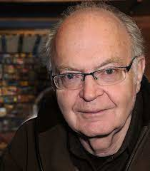

američki matematičar i računalni znanstvenik, rođen je 1938. godine, a diplomirao na Case Institute of Technology u Clevelandu, Ohio, 1960. godine. Knuth je poznat po svojim radovima na teoriji računalnih algoritama i programskim jezicima.

Jedno od značajnijih djela u njegovoj karijeri je serija knjiga "The Art of Computer Programming", koja je postala važno referentno djelo u području računalnih znanosti.

Napisao je i knjigu "Seminumerical Algorithms" 1969. godine, u kojoj se uz generiranje slučajnih brojeva, bavi i konstrukcijom algoritma za igru Mastermind temeljenog na matematičkim principima.

Knuth je također poznat po stvaranju programskih jezika TeX i Metafont. TeX se koristi za stvaranje dokumenata, dok Metafont omogućava dizajniranje fontova. Ova dostignuća su i dalje relevantna u akademskim krugovima.

##Implementacija i objašnjenje algoritma
Sljedeće ćelije koda izvršite po redu kako biste dobili funkcionalnu implementaciju algoritma.

Najprije importamo nekoliko korištenih funkcionalnosti.

In [ ]:
from random import randint
from itertools import product
from ipywidgets import IntSlider
from ipywidgets import Button
from ipywidgets import Label
from ipywidgets import Text
from IPython.display import display

Ako ste dobili grešku kod pokušaja importanja iz biblioteke ipywidgets, otkomentirajte i pokrenite donju naredbu za instalaciju biblioteke i pokušajte ponovno importirati.
Ako se prethodna ćelija izvršila uspješno, možete preskočiti izvršavanje sljedeće ćelije.

In [ ]:
# !pip install ipywidgets

Ovdje navodimo globalne varijable koje ćemo koristiti:
*   duljinaKoda - duljinu pogađanog koda,
*   brojBoja - broj boja među kojima biramo,
*   tajniKod - pogađani niz boja, pri ćemu su boje kodirane dekadskim znamenkama.

Pamćenje ovih varijabli kao globalnih potrebno je kako bismo interaktivno mogli mjenjati njihove vrjednosti.

In [ ]:
duljinaKodova = 4
brojBoja = 6
tajniKod = None
zastavicaZaRucnoPostavljenKod = False

Ako želite samostalno zadati kolika će biti duljina pogađanog niza i između koliko će se različitih boja pogađati, to možete korištenjem slidera koji će se stvoriti izvršavanjem sljedeće ćelije.

In [ ]:
sliderDuljinaKodova = IntSlider(value=4, min=3, max=6, step=1, description='Duljina:')
sliderBrojBoja = IntSlider(value=6, min=2, max=8, step=1, description='Broj boja:')

# Funkcije koje će se pozvati kada se promijeni vrijednost slajdera
def handle_sliderDuljinaKodova_change(change):
    global duljinaKodova
    duljinaKodova = change['new']
    global zastavicaZaRucnoPostavljenKod
    zastavicaZaRucnoPostavljenKod = False

def handle_sliderBrojBoja_change(change):
    global brojBoja
    brojBoja = change['new']
    global zastavicaZaRucnoPostavljenKod
    zastavicaZaRucnoPostavljenKod = False

# Registracija funkcija za rukovanje promjenama vrijednosti slajdera
sliderDuljinaKodova.observe(handle_sliderDuljinaKodova_change, names='value')
sliderBrojBoja.observe(handle_sliderBrojBoja_change, names='value')

# Prikaz slajdera
display(sliderDuljinaKodova)
display(sliderBrojBoja)

IntSlider(value=4, description='Duljina:', max=6, min=3)

IntSlider(value=6, description='Broj boja:', max=8, min=2)

Prelazimo na implementaciju funkcija korištenih u algoritmu (ćelije je potrebno izvršiti prije pokretanja main funkcije).

Funkcija vratiTajniKod generira tajni kod zadane duljine i s bojama iz zadanog raspona (radi jednostavnosti, boje su repezentirane znamenkama).

In [ ]:
def vratiTajniKod():
    """Generiranje random tajnog koda"""
    return "".join(str(randint(1, brojBoja)) for x in range(duljinaKodova))

Tajni kod možemo zadati i sami, pokretanjem donje ćelije i korištenjem jednostavnog interfacea koji se pritom stvori. Ako donju ćeliju ne izvršimo ili kroz interface ne zadamo valjani tajni kod, algoritam će koristiti prethodno stvorenu funkciju vratiTajniKod.

In [ ]:
def validate_input(change):
    try:
        unos = text_input.value

        # Provjeri je li unos ispravne duljine
        if(len(unos) != duljinaKodova):
            raise ValueError(f"Duljina nizova je postavljena na {duljinaKodova}")

        # Provjeri jesu li brojevi unutar zadanog raspona
        for broj in unos:
            if int(broj) < 1 or int(broj) > brojBoja:
                raise ValueError(f"Sve oznake boja moraju biti unutar zadanog raspona [1, {brojBoja}]")

        # Ispisi poruku o uspješnom unosu
        output_label.value = "Tajni kod je uspješno zadan!"

        # Ako prođe sve provjere, vrati vrijednost
        global tajniKod
        tajniKod = unos
        global zastavicaZaRucnoPostavljenKod
        zastavicaZaRucnoPostavljenKod = True

    except ValueError as e:
        # Ako dođe do greške, ispiši poruku o greški
        output_label.value = f"Greška: {e}"

# Tekstualni unos za znamenke
text_input = Text(
    value='',
    description='Tajni kod:',
    continuous_update=False
)

# Gumb za potvrdu unosa
confirm_button = Button(description="Potvrdi unos")

# Izlazna oznaka za prikaz poruka
output_label = Label(value="")

# Povezivanje funkcije s događajem klikanja na gumb
confirm_button.on_click(validate_input)

# Prikaz widgeta
display(text_input, confirm_button, output_label)

Text(value='', continuous_update=False, description='Tajni kod:')

Button(description='Potvrdi unos', style=ButtonStyle())

Label(value='')

Funkcija inicijalniPokušaj generira kod s kojim ćemo započeti našu seriju pogađanja. Knutov algoritam počinje s vrijednošću "1122", a isti postupak gdje niz započinje sa najvećeCijelo(duljinaKodova:2) jedinica, a preostalo su dvojke.

In [ ]:
def inicijalniPokusaj():
    br1 = duljinaKodova // 2
    br2 = duljinaKodova - br1
    return ("1" * br1 + "2" * br2)

Donja funkcija generirajSveKodove generira skup svih mogućih kodova boja zadane duljine i raspona.

Funkcija generirajSvePovratneInfo služi za generiranje svih potencijalnih povratnih informacija koje možemo dobiti nakon nekog kruga igre. Ona koristi i pomoćnu funkciju dodaj, koju koristimo rekurzivno. Ako predani kodovi nemaju nijednu zajedničku boju, funkcija vraća povratni kod ".", umjesto praznog stringa "".


Ovako dobivene skupove kasnije ćemo koristiti u minmax algoritmu.

In [ ]:
def generirajSveKodove():
    """generiranje skupa svih mogucih tajnih kodova"""
    znamenke = "".join(str(x) for x in range(1, brojBoja + 1))
    return set("".join(x) for x in product(znamenke, repeat=duljinaKodova))

In [ ]:
def dodaj(kod, svePovratneInfo):
    """pomocna funkcija od 'generirajSvePovratneInfo', rekurzivno dodavanje novog slova na postojece nizove"""
    svePovratneInfo.append(kod)
    if len(kod) < duljinaKodova:
        if kod[len(kod) - 1] != "C":
            dodaj(kod + "B", svePovratneInfo)
        dodaj(kod + "C", svePovratneInfo)


def generirajSvePovratneInfo():
    """generiranje liste svih mogucih povratnih informacijskih kodova"""
    svePovratneInfo = ["."]
    dodaj("B", svePovratneInfo)
    dodaj("C", svePovratneInfo)
    return svePovratneInfo

Funkcija vratiPovratnuInfo za predana dva koda, vraća informaciju o tome koliko su oni međusobno slični, odnosno koliko iznose brB i brC za dani par. Tu funkciju koristimo za generiranje povratne informacije u svakom koraku igre, ali i kao pomoćnu funkciju u funkciji ukloniNezadovoljavajuceKodove koju definiramo odmah ispod.

In [ ]:
def brJednakihSlova(trenutniPokusaj, tajniKod):
    """racunanje koliko ima istih slova u dva koda, neovisno o polozaju slova"""
    slovaTrenutni = {}
    slovaTajni = {}
    for slovo in trenutniPokusaj:
        slovaTrenutni[slovo] = slovaTrenutni.get(slovo, 0) + 1
    for slovo in tajniKod:
        slovaTajni[slovo] = slovaTajni.get(slovo, 0) + 1

    podudaranja = 0
    for slovo, broj_pojavljivanja in slovaTrenutni.items():
        if slovo in slovaTajni:
            podudaranja += min(broj_pojavljivanja, slovaTajni[slovo])

    return podudaranja


def vratiPovratnuInfo(trenutniPokusaj, tajniKod):
    """vracanje povratne informacije o uspjesnosti trenutnog pokusaja"""

    #brojanje potpunih pogodaka
    brC = sum(i == j for i, j in zip(trenutniPokusaj, tajniKod))

    #brojanje djelomicnih pogodaka
    brB = brJednakihSlova(trenutniPokusaj, tajniKod) - brC

    if brC == 0 and brB == 0:
        return "."

    return ("B" * brB + "C" * brC)

Nakon što dobijemo povratnuInformaciju o prethodnom pokušaju, reduciramo skup kodova koje smatramo kandidatima za tajni kod. Naime za proizvoljni preostali kod pretpostavimo da je ujedno tajni kod i provjerimo koju će nam povratnu informaciju dati sa prethodnim pokušajem. Ako tako dobivena povratna informacija nije povratnaInformacija, dobili smo kontradikciju i možemo izbaciti taj kod iz skupa kandidata. Tako u svakom krugu reduciramo broj potencijalnih kandidata, dok nam ne ostane samo jedan.

In [ ]:
def ukloniNezadovoljavajuceKodove(povratnaInfo, trenutniPokusaj, polazniKodovi):
    """uklanjanje iz skupa preostalih kodova one koji ne odgovaraju zadnjoj povratnoj informaciji"""
    #stvori novi set koji dodaje samo one koje treba i to vrati
    filtriraniKodovi = set()
    for i in polazniKodovi:
        tempInfo = vratiPovratnuInfo(i, trenutniPokusaj)
        if tempInfo == povratnaInfo:
            filtriraniKodovi.add(i)
    return filtriraniKodovi

U funkciji izaberiNajboljegKandidata vrednujemo sljedeće potencijane kandidate i u njoj je smještena min-max logika algoritma. U vanjskoj petlji prelazimo po svim preostalim kodovima  Testiramo svaki mogući potencijalni kod i gledamo od svih mogućih povratnih kodova koje možemo dobiti uz taj pokušaj, koliko najviše preostalih kodova može biti pridruženo pripadnoj povratnoj informaciji. Za sljedeći korak na kraju biramo onaj kod za koji je maksimalna pridružena vrijednost najmanja. Na taj način ograničavamo koliko najviše kodova može ostati neeliminirano u sljedećem koraku.

**Dakle nastojimo *minimizirati* *maksimalni* broj neeliminiranih kodova u sljedećem koraku. Koristimo i podrezivanje, naime ako vidimo da će za nekog kandidata broj pojavljivanja neke povratne vrijednosti premašiti da sada pronađeni maksimalni broj ponavljanja za nekog prethodno testiranog kandidata, tog kandidata odmah odbacujemo.**

In [ ]:
def izaberiNajboljegKandidata(preostaliKodovi, svePovratneInfo):
    """ocjenjuje preostale kandidate"""
    maxInt = 7 ** duljinaKodova
    kvalitetePokusaja = dict.fromkeys(preostaliKodovi, maxInt)
    minimumNeeliminiranihKodova = maxInt
    najboljiKandidat = ""

    #petlja po potencijalnim kandidatima za sljedeci potez:
    for privremeniPokusaj in preostaliKodovi:
        ucestalostPovratneInfo = dict.fromkeys(svePovratneInfo, 0)
        maksUcestalost = 0

        for i in preostaliKodovi:
            if i == privremeniPokusaj:
                continue
            privremeniPovratniKod = vratiPovratnuInfo(i, privremeniPokusaj)
            ucestalostPovratneInfo[privremeniPovratniKod] += 1
            if ucestalostPovratneInfo[privremeniPovratniKod] >= minimumNeeliminiranihKodova:
                break

        #pokusaj se vrednuje kao supremumom ucestalosti ponavljanja povratnih kodova
        kvalitetePokusaja[privremeniPokusaj] = max(ucestalostPovratneInfo.values())
        if kvalitetePokusaja[privremeniPokusaj] < minimumNeeliminiranihKodova:
            minimumNeeliminiranihKodova = kvalitetePokusaja[privremeniPokusaj]
            najboljiKandidat = privremeniPokusaj

    return najboljiKandidat

Preostaje upotrijebiti sve implementirane funkcije u pravilnom poretku. Prvo generiramo potrebne skupove i kodove, a zatim svaki korak while petlje odgovara jednom koraku igre. Za trenutni pokušaj prvog igrača dobijemo povratnu informaciju, na temelju koje eliminiramo nepotrebne kodove i nakon toga prelazimo na odabir sljedećeg pokušaja za pogodak.

In [ ]:
def mastermind(tajniKod):
    print("Tajni kod: ", tajniKod, "\n---------------------------\n")

    trenutniPokusaj = inicijalniPokusaj()
    preostaliKodovi = generirajSveKodove()
    svePovratneInfo = generirajSvePovratneInfo()

    runda = 1
    while trenutniPokusaj != tajniKod:
        povratnaInfo = vratiPovratnuInfo(trenutniPokusaj, tajniKod)
        preostaliKodovi = ukloniNezadovoljavajuceKodove(povratnaInfo, trenutniPokusaj, preostaliKodovi)
        print(f"Korak: {runda}\nTrenutni pokusaj: {trenutniPokusaj}\nPreostalo kodova: {len(preostaliKodovi)}\n")
        trenutniPokusaj = izaberiNajboljegKandidata(preostaliKodovi, svePovratneInfo)
        runda += 1
    print(f"Korak: {runda}\nTrenutni pokusaj: {trenutniPokusaj}\n")

    global zastavicaZaRucnoPostavljenKod
    zastavicaZaRucnoPostavljenKod = False
    print(f"Algoritam je pogodio tajni kod u {runda} koraka.")
    if runda > 6:
        print(tajniKod)

Pokretanjem donje ćelije pokrećete cijeli algoritam. Slobodno pokrenite ćeliju više puta, mijenjajte dozvoljene parametre i vidite rezultate za različite kodove.

In [ ]:
if zastavicaZaRucnoPostavljenKod == False:
    tajniKod = vratiTajniKod()

mastermind(tajniKod)

Tajni kod:  3421 
---------------------------

Korak: 1
Trenutni pokusaj: 1122
Preostalo kodova: 208

Korak: 2
Trenutni pokusaj: 1641
Preostalo kodova: 32

Korak: 3
Trenutni pokusaj: 3131
Preostalo kodova: 3

Korak: 4
Trenutni pokusaj: 5111
Preostalo kodova: 1

Korak: 5
Trenutni pokusaj: 3421

Algoritam je pogodio tajni kod u 5 koraka.


## Izvori

*   [Stranica engleske Wikipedije o Mastermindu, https://en.wikipedia.org/wiki/Mastermind_(board_game)](https://en.wikipedia.org/wiki/Mastermind_(board_game))
*   [Online dostupna simulacija igre Mastermind, https://webgamesonline.com/mastermind/](https://webgamesonline.com/mastermind/)
*   [ChatGPT 3.5, https://chat.openai.com/](https://chat.openai.com/)
*   [Stranica Wikipedije o Donaldu Knutu, https://en.wikipedia.org/wiki/Donald_Knuth](https://en.wikipedia.org/wiki/Donald_Knuth)